이번 실습을 통해, 텐서플로우로 구현된 RNN을 직접 분석해보도록 하겠습니다.

In [2]:
from IPython.display import Image

기본적으로 RNN은 아래의 다이어그램과 같이 구현됩니다.  
보시다시피, RNN은 입력값(x), 출력값(output), 상태값(state), 가중치(W), 편향값(b), 그리고 활성화함수(tanh)로 구성되어 있습니다.

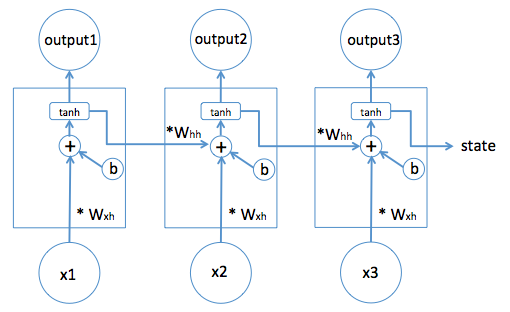

In [4]:
Image("simple_rnn.png", width=450, height=200)

# RNN 텐서플로우 코드 구현

예제를 직접 텐서플로우로 구현하여 입력값, 출력값, 상태값, 가중치, 편향값을 확인해보도록 하겠습니다.

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
import numpy as np

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(1)
np.random.seed(1)

In [14]:
# 입력값의 형태를 지정합니다.
inputs = Input(shape=(1,2))
"""
RNN 셀의 속성을 지정합니다.
3: 3차원 벡터의 출력값 지정합니다.
return_state=True: RNN 셀의 상태값(state)를 출력하도록 지정합니다.
"""

inputs

<tf.Tensor 'input_3:0' shape=(None, 1, 2) dtype=float32>

In [15]:
output, state = SimpleRNN(3, return_state=True)(inputs)

model = Model(inputs=inputs, outputs=[output, state])

In [16]:
# 테스트 입력값
data = np.array([[ [1,2] ]])

# 출력값, 상태값 프린트
output, state = model.predict(data)

print("output: ",output)
print("state: ",state)

output:  [[-0.77005637 -0.03206512  0.72178566]]
state:  [[-0.77005637 -0.03206512  0.72178566]]


위 코드의 출력값을 통해, 텐서플로우 RNN이 우리가 이론으로 다룬 RNN과 같은 것을 확인할 수 있습니다..  
1. RNN 셀이 한개일 경우 그 출력값과 상태값이 동일합니다.  

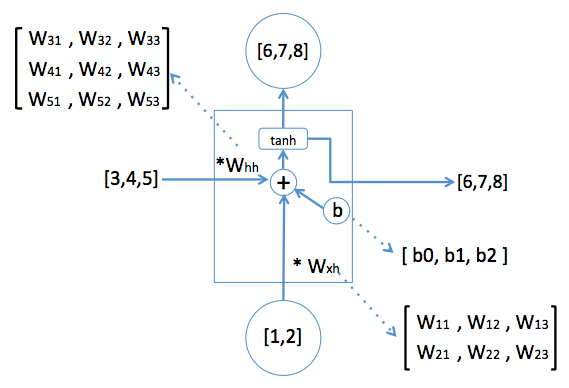

In [17]:
Image("rnn_single.png", width=450, height=200)

In [18]:
# 입력값에 대한 가중치 행렬의 값을 확인합니다.

model.layers[1].weights[0]

<tf.Variable 'simple_rnn_2/simple_rnn_cell_2/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.73366153,  0.8796015 ,  0.28695   ],
       [-0.14340228, -0.4558388 ,  0.3122064 ]], dtype=float32)>

입력값이 1 x 2 행렬이므로 입력값에 대한 가중치 행렬은 2 x 3 행렬입니다.

In [19]:
# 이전 상태값에 대한 가중치 행렬의 값을 확인합니다.

model.layers[1].weights[1]

<tf.Variable 'simple_rnn_2/simple_rnn_cell_2/recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.2532742 , -0.8955574 ,  0.36582667],
       [ 0.8398052 ,  0.0158366 , -0.5426569 ],
       [-0.4801869 , -0.4446641 , -0.7561047 ]], dtype=float32)>

상태값이 1 x 3 행렬이므로, 상태값에 대한 가중치 행렬은 3 x 3 행렬입니다.

In [39]:
# 편향값 행렬의 값을 확인합니다.
model.layers[1].weights[2]

<tf.Variable 'simple_rnn_4/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

상태값이 3차원 벡터이므로, 3개의 편향값이 존재합니다.

# 텐서플로우로 단어 품사 구분하기 예제 구현하기


- I work at google  나는 구글에서 일한다.
- I google at work  나는 직장에서 구글링을 한다.

위의 단어 품사를 구분하는 RNN 코드를 텐서플로우로 구현해보도록 하겠습니다.  

각 단어는 one hot encoding으로 표현합니다.

In [21]:
# I      [1,0,0,0]
# work   [0,1,0,0]
# at     [0,0,1,0]
# google [0,0,0,1]
#
# I work at google =  [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1] ]
# I google at work =  [ [1,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0] ]

data = np.array([
    [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1] ],
    [ [1,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0] ]
])

아래의 코드를 실행하여, 결과값을 확인합니다.

In [22]:
# 입력값의 형태를 지정합니다.
inputs = Input(shape=(4, 4))

"""
RNN 셀의 속성을 지정합니다.
3 ->  3차원 벡터의 출력값 지정합니다.
return_state=True -> RNN 셀의 상태값(state)를 출력하도록 지정합니다.
return_sequences ->  hidden state를 출력할 것인지에 대한 값
"""

output, state = SimpleRNN(3, return_state=True, return_sequences=True)(inputs)

model = Model(inputs=inputs, outputs=[output, state])

In [23]:
# 출력값, 상태값 프린트
output, state = model.predict(data)

In [24]:
print("I work at google: ",output[0])
print()
print()
print("I google at work: ",output[1])

I work at google:  [[ 0.54391825  0.24354757  0.02726344]
 [ 0.2543367  -0.22151536 -0.70710266]
 [-0.0213326   0.71822613  0.06801447]
 [-0.27135777 -0.4469267   0.00939073]]


I google at work:  [[ 0.54391825  0.24354757  0.02726344]
 [ 0.17483439 -0.34557    -0.5084784 ]
 [-0.20281316  0.7054854  -0.09443939]
 [-0.2546866  -0.15914649 -0.16518137]]


1. 두 문장의 첫단어 출력값이 동일합니다. 이는 첫단어에는 이전 상태값이 존재하지 않기 때문입니다.  
2. 두번째 단어부터의 출력값은 두 문장이 다르게 나타납니다. 이는 이전 상태값이 현재 출력값에 영향을 주기 때문입니다.

In [26]:
print("I work at google: state: ",state[0])
print()
print("I google at work: state: ",state[1])

I work at google: state:  [-0.27135777 -0.4469267   0.00939073]

I google at work: state:  [-0.2546866  -0.15914649 -0.16518137]


3. 상태값은 항상 마지막 단어의 출력값과 동일합니다.  

.

# SimpleRNN 네트워크 예제

**[0.0, 0.1, 0.2, 0.3] 이라는 0.1씩 늘어나는 수열 이후의 값 예측**

In [27]:
X = [] 
Y = [] 

for i in range(6): 
    lst = list(range(i,i+4)) 
    X.append(list(map(lambda c: [c/10], lst))) 
    Y.append((i+4)/10) 

X = np.array(X) 
Y = np.array(Y) 

print(X) 
print()
print(Y)


# X에 0, 0.1, 0.2, 0.3 같은 수열들을 0.1씩 증가하면서 나열해줍니다. 
# 해당 수열의 답인 Y는 0.4부터 0.1씩 증가하면서 들어가게 됩니다.


[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]

[0.4 0.5 0.6 0.7 0.8 0.9]


#### 모델 만들기 & 학습

In [28]:
# 모델은 Sequential에 SimpleRNN과 Dense레이어를 1개씩 추가
# input_shape는 4 time-step마다 하나의 답이라서 [4,1]을 선언함

model = tf.keras.Sequential([ tf.keras.layers.SimpleRNN(units=10, 
                                                        return_sequences=False, 
                                                        input_shape=[4,1]), 
                             tf.keras.layers.Dense(1) ])

In [29]:
model.compile(optimizer='adam', loss='mse')

In [30]:
history = model.fit(X, Y, epochs=100, verbose=0)

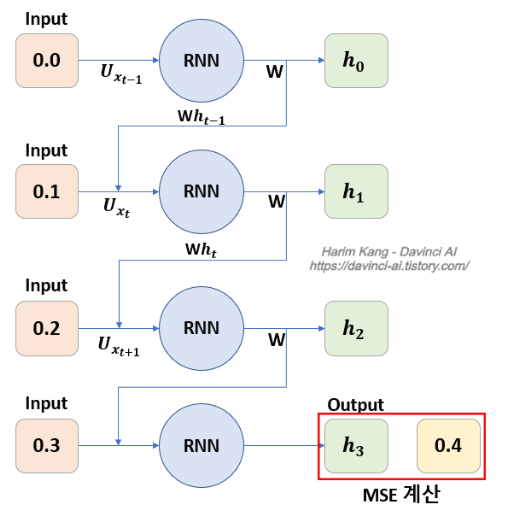

위와 같은 학습을 반복하여서 MSE값을 낮추는 훈련을 하게 됩니다.

#### 예측

In [31]:
# 기존의 훈련 데이터 세트를 넣어서 예측

print(model.predict(X))

[[0.350666  ]
 [0.50733435]
 [0.6384905 ]
 [0.7405599 ]
 [0.8131081 ]
 [0.85800153]]


새로운 데이터를 예측

In [33]:
 # 데이터를 넣어서 원하는 결과는 1.2에 가까운 수입니다.


X_test = np.array([[[0.8],[0.9],[1.0],[1.1]]]) 

print(model.predict(X_test))

[[0.8607819]]


그러나 위와 같은 결과를 얻었습니다. 

이것은 훈련 데이터를 증가시켜서 해당 결과를 개선시킬 수 있습니다.


### RNN의 문제점 : 장기 의존성

- 기존의 RNN은 단점이 있습니다. 입력 데이터가 커지면, 학습 능력이 저하된다는 점입니다. 데이터의 뒤쪽으로 갈수록, 앞쪽의 입력 데이터를 까먹게 된다고 이해할 수 있습니다.

- 입력 데이터와 출력 데이터 사이의 길이가 멀어질수록 연관 관계가 줄어듭니다. 이를 장기 의존성(Long-Term Dependency)문제 라고 합니다.


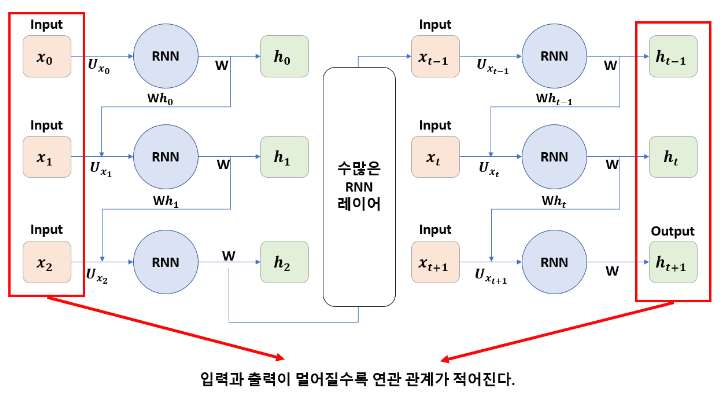

장기 의존성 문제를 해결하기 위해서 RNN의 변형 구조인 LSTM(Long Short Term Memory)가 나오게 되었습니다.


### LSTM in Tensorflow 2.0

텐서 플로우 2.0에서 앞서 정리한 SimpleRNN에서 LSTM으로 클래스 명만 바꾸어주면 됩니다.

In [41]:
X = [] 
Y = [] 

for i in range(6): 
    lst = list(range(i,i+4)) 
    X.append(list(map(lambda c: [c/10], lst))) 
    Y.append((i+4)/10) 

X = np.array(X) 
Y = np.array(Y) 

print(X) 
print()
print(Y)


# X에 0, 0.1, 0.2, 0.3 같은 수열들을 0.1씩 증가하면서 나열해줍니다. 
# 해당 수열의 답인 Y는 0.4부터 0.1씩 증가하면서 들어가게 됩니다.

[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]

[0.4 0.5 0.6 0.7 0.8 0.9]


In [54]:
# 모델은 Sequential에 SimpleRNN과 Dense레이어를 1개씩 추가
# input_shape는 4 time-step마다 하나의 답이라서 [4,1]을 선언함

model = tf.keras.Sequential([ tf.keras.layers.LSTM(units=30, 
                                                        return_sequences=True, 
                                                        input_shape=[4,1]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1) ])

In [55]:
model.compile(optimizer='adam', loss='mse')

In [56]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4, 30)             3840      
_________________________________________________________________
lstm_13 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3062 - val_loss: 0.6737
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2953 - val_loss: 0.6512
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2844 - val_loss: 0.6288
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2735 - val_loss: 0.6063
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2627 - val_loss: 0.5837
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2518 - val_loss: 0.5609
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2409 - val_loss: 0.5378
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2299 - val_loss: 0.5145
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2188 - val_loss: 0.4909
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2075 - val_loss: 0.4669
Epoch 11/100
1/1 [===

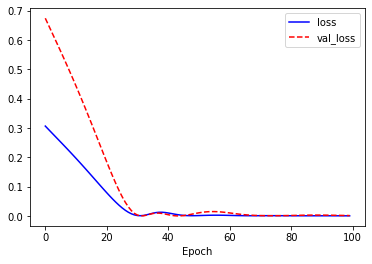

In [57]:
import matplotlib.pyplot as plt

history = model.fit(X, Y, epochs=100, validation_split=0.2)

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [58]:
history = model.fit(X, Y, epochs=100, verbose=0)

In [59]:
# 기존의 훈련 데이터 세트를 넣어서 예측

print(model.predict(X))

[[0.40878245]
 [0.49888173]
 [0.59418744]
 [0.6942615 ]
 [0.79853016]
 [0.90630287]]


새로운 데이터를 예측

In [60]:
 # 데이터를 넣어서 원하는 결과는 1.2에 가까운 수입니다.


X_test = np.array([[[0.8],[0.9],[1.0],[1.1]]]) 

print(model.predict(X_test))

[[1.2425684]]


# -------------------------------------------------------------------

# LSTM(Long Short Term Memory) 레이어


#### LSTM(Long Short Term Memory) 레이어

- 간단한 RNN의 구조로는 위와 같은 장기 의존성 문제가 발생합니다. 
- 이를 해결하기위해서 제안된 RNN의 변형 구조가 바로 LSTM입니다.


#### LSTM의 구조

- LSTM 레이어는 출력 값 이외에, LSTM셀 사이에서 공유되는 셀의 상태가 존재한다는 점이 특징입니다.


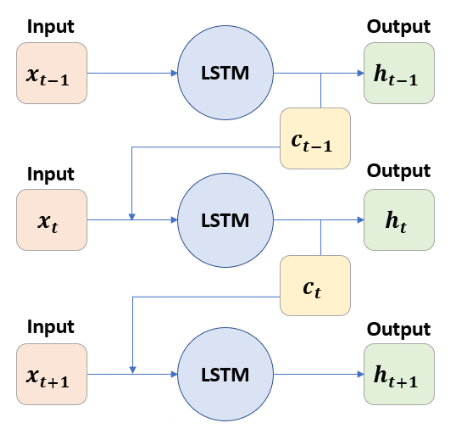

- 위의 그림과 같이 기존 RNN에서 c라는 셀 상태(cell state)라는 변수가 추가적으로 공유가 됩니다.
- 이러한 셀 상태가 함께 다음 레이어로 전달되면서, 기존의 상태를 보존하여 장기의존성 문제를 해결합니다.

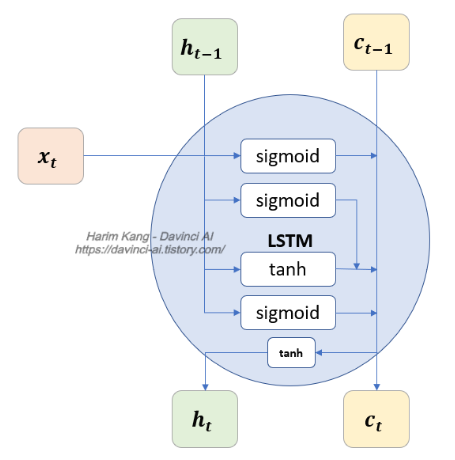

#### 활성화 함수는 두 가지로 아래와 같습니다.

- tanh: 기존의 RNN에서 사용되는 활성화 함수입니다. 해당 함수는 relu로 대체될 수 있습니다.
- sigmoid: 정보가 0과 1 사이에서 얼마나 통과할지를 결정하는 함수입니다.


좀 더 자세히 살펴보겠습니다.

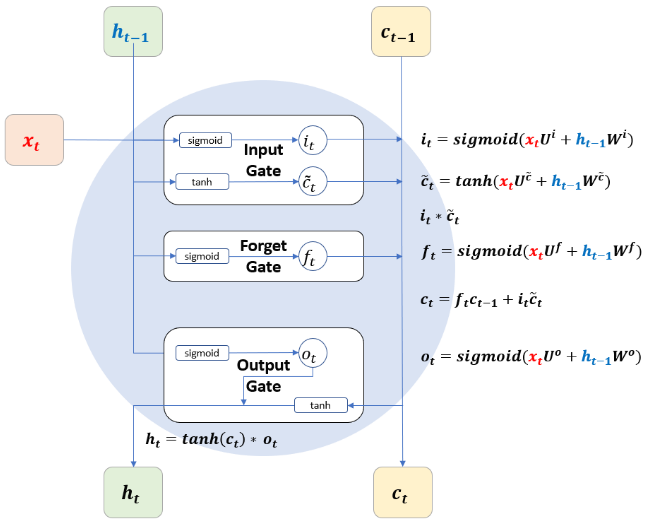

- 위의 그림처럼 LSTM 레이어는 Input Gate, Forget Gate, Output Gate라는 c(cell state)의 값을 제어하는 게이트들이 존재합니다. 각 게이트들은 sigmoid layer와 pointwise곱 연산을 통해서 값을 제어합니다.

- 각각의 게이트들은 cell state를 보호하고 제어하는 역할을 합니다.


#### Input gate layer

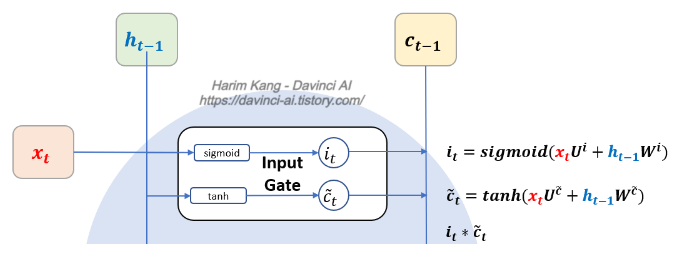

#### Forget gate layer

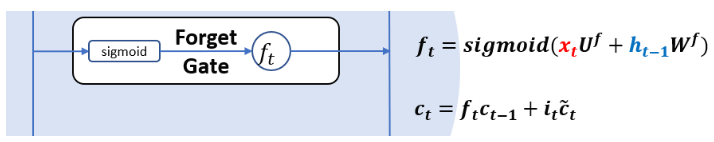

#### Output gate layer

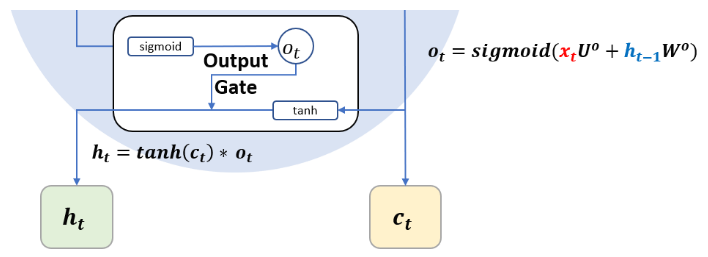

- 어떤 값을 출력할지를 결정하는 게이트입니다.
- cell state의 어떤 부분을 출력할 지를 정하는 것이 바로 게이트의 sigmoid layer입니다.
- cell state를 tanh 하여 나온 -1과 1 사이의 값을 sigmoid 출력 값과 곱하여 최종 출력 값을 연산합니다.
